# Quadratic layer:
In this small project, we try to build and create a custom layer that instead of normal dense layer which are defined for us and they do a simple $output = wx + c$, we try to build a layer which does $y = ax^2 + bx + c$.

- The steps are the same as before, but the only thing that is different is that we define $a$ and $b$ from a normal distribution and $c$ to be zero. These are the initial values of these trainable weights.
- Also, pay careful attention how we do the mathmatical operations using `tensorflow.math` class.

In [1]:
# Imports
import tensorflow as tf
from tensorflow.keras.layers import Layer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Building the quadratic layer
class SimpleQuadraticDense(Layer):
    def __init__(self, units=32, activation=None):
        """Initialize an instance of the custom layer"""
        super().__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    # Create state of the layer
    # Initializing and defining trainable kernels and biases
    def build(self, input_shape):
        # Initialize normal distribution for a
        a_init = tf.random_normal_initializer()
        # Initialize a with defined normal distribution
        self.a = tf.Variable(name='kernel_a',
                            initial_value=a_init(shape=(input_shape[-1], self.units), dtype=tf.float32),
                            trainable=True)
        # Initialize normal distribution for b
        b_init = tf.random_normal_initializer()
        # Initialize b with defined normal distribution
        self.b = tf.Variable(name='kernel_b',
                            initial_value=b_init(shape=(input_shape[-1], self.units), dtype=tf.float32),
                            trainable=True)
        # Zero initializer for biases (c)
        c_init = tf.zeros_initializer()
        # Initialize with zero values
        self.c = tf.Variable(name='bias',
                            initial_value=c_init(shape=(self.units,), dtype=tf.float32),
                            trainable=True)

    # Create a method for computing the quadratic transformation
    def call(self, inputs):
        output = tf.matmul(tf.math.square(inputs), self.a) + tf.matmul(inputs, self.b) + self.c
        # Apply nonlinearity using activation function
        return self.activation(output)

In [5]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = (X_train / 255.), (X_test / 255.)

# Defining a simple sequential model using the custom layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    SimpleQuadraticDense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8998 - val_loss: 0.1605 - val_accuracy: 0.9538
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1661 - accuracy: 0.9508 - val_loss: 0.1222 - val_accuracy: 0.9643
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1264 - accuracy: 0.9628 - val_loss: 0.0994 - val_accuracy: 0.9700
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1010 - accuracy: 0.9699 - val_loss: 0.0875 - val_accuracy: 0.9730
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9739 - val_loss: 0.0850 - val_accuracy: 0.9755
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0735 - accuracy: 0.9779 - val_loss: 0.0774 - val_accuracy: 0.9771
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0664 - accuracy: 0.9793 - val_loss: 0.0747 - val_accuracy: 0.9768
Epoch 

In [6]:
history_df = pd.DataFrame(history.history, columns=['loss', 'accuracy',
                                                   'val_loss', 'val_accuracy'])
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.344351,0.899783,0.160502,0.9538
1,0.166119,0.950800,0.122249,0.9643
2,0.126368,0.962833,0.099421,0.9700
3,0.100988,0.969850,0.087507,0.9730
4,0.086048,0.973850,0.085000,0.9755
5,0.073519,0.977850,0.077443,0.9771
6,0.066353,0.979350,0.074733,0.9768
7,0.058098,0.981467,0.071400,0.9792
8,0.050298,0.983983,0.070124,0.9794
9,0.047095,0.984600,0.070459,0.9793


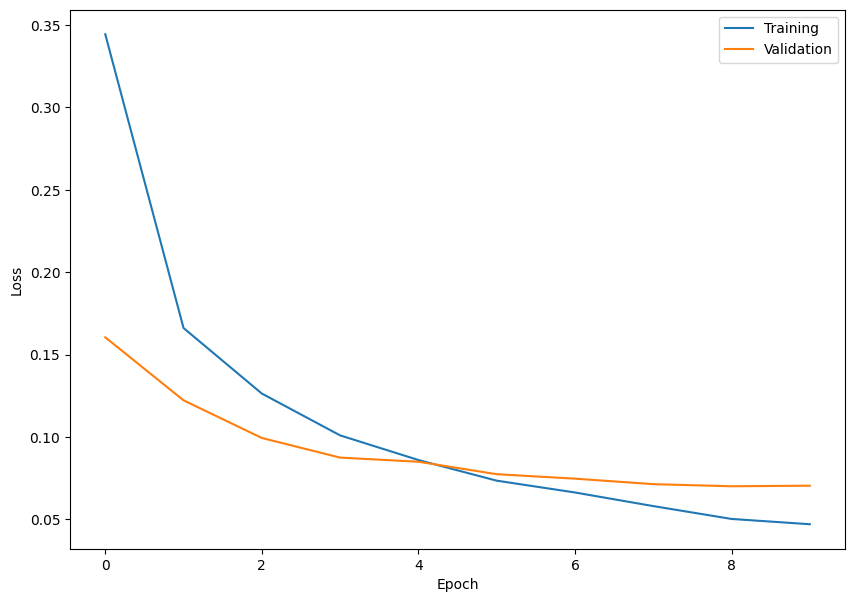

In [8]:
fig, ax = plt.subplots(figsize=(10, 7))
history_df['loss'].plot(ax=ax, label='Training')
history_df['val_loss'].plot(ax=ax, label='Validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()